In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# I will be Following the data scince process
## 1.Business Understanding
## 2.Data Understanding
## 3.Modeling
## 4.Evaluation
## 5.Deployment

In [2]:
df=pd.read_csv('jersey city airbnb listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20211220161334,2021-12-21,Skyy’s Lounge / Cozy,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20211220161334,2021-12-21,Minutes to Manhattan & Jersey Shore,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,...,4.90,4.31,4.80,STR20-00055,f,1,1,0,0,1.10
2,269266,https://www.airbnb.com/rooms/269266,20211220161334,2021-12-20,Modern private 2 bedrooms apt minutes to NYC,Enjoy that private luxury two bedrooms apartme...,Our House is located in the Liberty State Park...,https://a0.muscache.com/pictures/5c8382e2-d2d8...,1410590,https://www.airbnb.com/users/show/1410590,...,4.65,3.80,4.44,NaN,t,8,1,7,0,3.10
3,270245,https://www.airbnb.com/rooms/270245,20211220161334,2021-12-22,Private room with own bathroom close to NYC,Just for you small bedroom with private bathro...,NaN,https://a0.muscache.com/pictures/83004bc4-6ff2...,1410590,https://www.airbnb.com/users/show/1410590,...,4.68,3.89,4.57,NaN,t,8,1,7,0,2.04
4,271255,https://www.airbnb.com/rooms/271255,20211220161334,2021-12-22,Large Room with private bathroom min to Manhattan,You can enjoy your stay in large bedroom with ...,NaN,https://a0.muscache.com/pictures/26d49bd9-efe3...,1410590,https://www.airbnb.com/users/show/1410590,...,4.56,3.76,4.37,NaN,t,8,1,7,0,2.43


In [3]:
df.shape

(1001, 74)

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df.neighbourhood_cleansed.value_counts()

Ward E (councilmember James Solomon)           360
Ward C (councilmember Richard Boggiano)        177
Ward F (councilmember Jermaine D. Robinson)    171
Ward D (councilmember Michael Yun)             140
Ward B (councilmember Mira Prinz-Arey)          82
Ward A (councilmember Denise Ridley)            71
Name: neighbourhood_cleansed, dtype: int64

# Business Understanding

# Some Potential Questions

## 1. Does the location of the property influence the price (geopandas),
## 2. Does the amount or quality of amenities corralate to a higher rating, 
## 3. Do hosts who are 'super_host' varified tend to have more or less availibility, 
## 4. Do above average prices also corralate to a higher overal rating ('review_scores_value') 



# Data Understanding

## I noticed that there are many columns that I dont need so I will create a new datafram with the ones that I want to use for my questions.

In [6]:
new_df=df[['id','description','host_name','host_is_superhost','neighbourhood_cleansed','neighbourhood','latitude',
       'longitude', 'property_type', 'room_type', 'accommodates','amenities', 'price','number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value','reviews_per_month']].copy()

In [7]:
new_df.describe()

,id,latitude,longitude,accommodates,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,737.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,737.000000
mean,3.568748e+07,40.725206,-74.057730,3.763237,28.969031,4.635156,4.717026,4.636112,4.816617,4.791241,4.603452,4.634789,1.369824
std,1.553927e+07,0.013781,0.017792,2.549291,55.567761,0.600365,0.519104,0.526554,0.426021,0.433149,0.525898,0.474971,1.472770
min,4.066900e+04,40.680595,-74.106990,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.319890e+07,40.717090,-74.071460,2.000000,0.000000,4.530000,4.670000,4.500000,4.810000,4.760000,4.480000,4.530000,0.320000
50%,3.977404e+07,40.723980,-74.053690,3.000000,5.000000,4.770000,4.860000,4.780000,4.950000,4.940000,4.750000,4.740000,0.910000
75%,5.000920e+07,40.733480,-74.043180,5.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.940000,2.000000
max,5.389060e+07,40.760700,-74.029390,16.000000,386.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000


# Data Preperation

## How many of the values of the dataset are missing ? how many should I remove if any?

In [8]:
new_df.isnull().sum()

id                               0
description                     27
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  366
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating           264
review_scores_accuracy         268
review_scores_cleanliness      268
review_scores_checkin          268
review_scores_communication    268
review_scores_location         268
review_scores_value            268
reviews_per_month              264
dtype: int64

## A big chuck of my review data is null I will create a new data frame to find all the rows that have all their rows 'null' then drop them 

In [9]:
all_null_review_df=new_df[(new_df.iloc[:,14:].isnull()).all(1)]

In [10]:
all_null_review_df.isnull().sum()

id                               0
description                     18
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  153
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating           264
review_scores_accuracy         264
review_scores_cleanliness      264
review_scores_checkin          264
review_scores_communication    264
review_scores_location         264
review_scores_value            264
reviews_per_month              264
dtype: int64

In [11]:
all_null_review_df.isnull().all()

id                             False
description                    False
host_name                      False
host_is_superhost              False
neighbourhood_cleansed         False
neighbourhood                  False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
amenities                      False
price                          False
number_of_reviews              False
review_scores_rating            True
review_scores_accuracy          True
review_scores_cleanliness       True
review_scores_checkin           True
review_scores_communication     True
review_scores_location          True
review_scores_value             True
reviews_per_month               True
dtype: bool

In [12]:
new_df.shape

(1001, 22)

## As shown above, 264 rows have all of there review columns empty/missing so i will have to drop the those columns , in my mind there are several reasons to drop them. 
## 1) I can not make predictions on missing data
## 2) creating any visualizations on using that data can skew the graphs
## 3) If i decided to impute  data could create bias models


In [13]:
#new_df.drop(new_df[new_df.iloc[:,14:].isnull().all(1)])
#newer_df=new_df.dropna(subset=[iloc[:,14:].dropna(how='all').copy()
newer_df=new_df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],thresh=2).copy()


In [14]:
newer_df

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Ward C (councilmember Richard Boggiano),"Jersey City, New Jersey, United States",40.73742,-74.05255,Private room in condominium (condo),Private room,...,$128.00,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71663,-74.05799,Entire residential home,Entire home/apt,...,$111.00,137,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71266,-74.06329,Entire rental unit,Entire home/apt,...,$109.00,380,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71440,-74.05805,Entire rental unit,Entire home/apt,...,$105.00,1,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,Ward B (councilmember Mira Prinz-Arey),"Jersey City, New Jersey, United States",40.71598,-74.09168,Entire rental unit,Entire home/apt,...,$138.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Ward D (councilmember Michael Yun),"Jersey City, New Jersey, United States",40.74452,-74.05993,Entire rental unit,Entire home/apt,...,$164.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Ward E (councilmember James Solomon),NaN,40.71918,-74.03405,Entire rental unit,Entire home/apt,...,$129.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00


In [15]:
newer_df.isnull().sum()

id                               0
description                      9
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  213
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           4
review_scores_cleanliness        4
review_scores_checkin            4
review_scores_communication      4
review_scores_location           4
review_scores_value              4
reviews_per_month                0
dtype: int64

## As shown above there are still some missing values in all the review columns , next I will check to see if i need to remove  any more or if I can simply impute values in those columns 

In [16]:
newer_df.loc[newer_df['review_scores_rating']<2.0]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
175,18457368,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,Ward E (councilmember James Solomon),"Jersey City, New Jersey, United States",40.72484,-74.03607,Entire rental unit,Entire home/apt,...,$319.00,1,1.0,1.0,5.0,2.0,4.0,5.0,2.0,0.08
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07
654,46006086,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,Ward E (councilmember James Solomon),NaN,40.72466,-74.03761,Entire rental unit,Entire home/apt,...,$229.00,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.55
837,51846874,this beautiful house is perfect for a big fami...,Ehab,f,Ward C (councilmember Richard Boggiano),NaN,40.73489,-74.05252,Entire residential home,Entire home/apt,...,$159.00,1,1.0,1.0,1.0,4.0,4.0,2.0,1.0,1.00
847,51990254,No frill simple room perfect getaway from the ...,Waseem,f,Ward B (councilmember Mira Prinz-Arey),NaN,40.72923,-74.07949,Private room in rental unit,Private room,...,$35.00,1,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.00
896,52732937,"Dear travelers and Airbnbers,<br /><br />This ...",Jimmy,f,Ward D (councilmember Michael Yun),NaN,40.74561,-74.04422,Private room in loft,Private room,...,$364.00,1,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.57


In [17]:
newer_df.loc[newer_df['review_scores_cleanliness'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [18]:
newer_df.loc[newer_df['review_scores_checkin'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [19]:
newer_df.loc[newer_df['review_scores_communication'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [20]:
newer_df.loc[newer_df['review_scores_location'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [21]:
newer_df.loc[newer_df['review_scores_value'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


## As shown I immediately found the 4 multiple rows with the missing values across the columns, i believe becuse the 'review rating column has a value 0.0 i can just impute zeros into the columns

In [22]:
newer_df.iloc[:,14:]=newer_df.replace(np.nan,0)

## Moving onto the City column

In [23]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

In [24]:
(newer_df.neighbourhood=='Jersey City, New Jersey, United States').sum()

520

In [25]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

## Instead of getting rid of the 366 missing values in the neighbourhood column and creating a  selection bias, I will fill those rows with the city the property is located by using the latitude and longitude coordinates 

## Using lat and lon to return address then strip it so it only returns the city and state

In [26]:
nan_neighbourhood=newer_df[newer_df['neighbourhood'].isnull()].copy()

In [27]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Ward E (councilmember James Solomon),NaN,40.71979,-74.04549,Entire rental unit,Entire home/apt,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,Ward C (councilmember Richard Boggiano),NaN,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Ward E (councilmember James Solomon),NaN,40.71355,-74.03374,Entire rental unit,Entire home/apt,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,53669633,Peaceful and centrally-located suite thoughtfu...,Khadijah,f,Ward B (councilmember Mira Prinz-Arey),NaN,40.71531,-74.09144,Entire rental unit,Entire home/apt,...,$135.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
960,53671565,"Keep it simple at this peaceful, safe, and cen...",Chris,f,Ward E (councilmember James Solomon),NaN,40.72226,-74.03933,Private room in rental unit,Private room,...,$140.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
967,53704490,This unique place has a style all its own. and...,Zohar,f,Ward A (councilmember Denise Ridley),NaN,40.70928,-74.09564,Private room in rental unit,Private room,...,$62.00,3,4.00,4.00,4.00,3.67,3.33,4.33,3.33,3.00
975,53717497,"Kick back and relax in this calm, stylish spac...",Zohar,f,Ward A (councilmember Denise Ridley),NaN,40.70986,-74.09496,Private room in condominium (condo),Private room,...,$66.00,5,4.20,4.20,4.60,4.20,4.20,4.60,4.20,5.00


In [28]:
nan_neighbourhood['neighbourhood'].isnull().sum()

213

## First i will make use that there are not missing Lat or Long coordinates

In [29]:
nan_neighbourhood[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

## Now i will use the geocoders library to reverse search each lon and lat pair then return just the city

In [30]:
from geopy.geocoders import Nominatim

In [31]:
geolocator= Nominatim(user_agent='http')
location = geolocator.reverse('40.71355,-74.03374')
print(location.raw.get('address').get('city'))

Jersey City


In [32]:
import geocoder
def geo_rev(x):
    g = geocoder.osm([x.latitude,x.longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'Nothing'
    
""" running the function by entering the latitude and longitude coordinantes and returning only the city, 
    the applying to the 'neighbourhood' column"""

nan_neighbourhood.neighbourhood=nan_neighbourhood[['latitude','longitude']].apply(geo_rev,axis=1)

In [33]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Ward E (councilmember James Solomon),Jersey City,40.71979,-74.04549,Entire rental unit,Entire home/apt,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,Ward C (councilmember Richard Boggiano),Jersey City,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Ward E (councilmember James Solomon),Jersey City,40.71355,-74.03374,Entire rental unit,Entire home/apt,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,53669633,Peaceful and centrally-located suite thoughtfu...,Khadijah,f,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71531,-74.09144,Entire rental unit,Entire home/apt,...,$135.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
960,53671565,"Keep it simple at this peaceful, safe, and cen...",Chris,f,Ward E (councilmember James Solomon),Jersey City,40.72226,-74.03933,Private room in rental unit,Private room,...,$140.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
967,53704490,This unique place has a style all its own. and...,Zohar,f,Ward A (councilmember Denise Ridley),Jersey City,40.70928,-74.09564,Private room in rental unit,Private room,...,$62.00,3,4.00,4.00,4.00,3.67,3.33,4.33,3.33,3.00
975,53717497,"Kick back and relax in this calm, stylish spac...",Zohar,f,Ward A (councilmember Denise Ridley),Jersey City,40.70986,-74.09496,Private room in condominium (condo),Private room,...,$66.00,5,4.20,4.20,4.60,4.20,4.20,4.60,4.20,5.00


## Filling the 'Nan' values in the new_df.neighbourhood using the vaules in nan_neighbourhood.neighbourhood column

In [34]:
newer_df.neighbourhood.fillna(nan_neighbourhood.neighbourhood,inplace=True)

In [35]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Jersey City                               211
Bayonne, New Jersey, United States          2
泽西城, New Jersey, United States              1
Union City, New Jersey, United States       1
Name: neighbourhood, dtype: int64

### I noticed that I need to extract only the 'Jersey City' for consistancy 

In [36]:
newer_df.neighbourhood=newer_df.neighbourhood.str[:11]

In [37]:
newer_df.neighbourhood.value_counts()

Jersey City    731
Bayonne, Ne      2
泽西城, New Je      1
Union City,      1
Name: neighbourhood, dtype: int64

### Now finally I will only keep the rows that contain 'Jersey city'

In [38]:
newer_df.drop(newer_df[newer_df.neighbourhood !='Jersey City'].index,inplace=True)

In [39]:
newer_df.neighbourhood.value_counts()

Jersey City    731
Name: neighbourhood, dtype: int64

## Moving onto the Price column
### I noticed that the 'price' column was missing when I used the pandas "describe" method which returns numerical data , and my suspicion was correct , using the 'dtypes' method shows that the price column is an object (string) 

In [40]:
newer_df.price.dtypes

dtype('O')

In [41]:
newer_df.price

0      $128.00
1      $111.00
2      $109.00
3       $46.00
4       $62.00
        ...   
987    $105.00
988    $138.00
993    $164.00
997    $129.00
999    $216.00
Name: price, Length: 731, dtype: object

### To change the 'price' column into an integer I will remove the the '$' from in front of each number than change them into integers

In [42]:
# I notices that the price is an object because it has the '$' in front so i will change that to a int

newer_df['price']=newer_df['price'].str.replace('$','')
newer_df['price']=newer_df['price'].str.replace(',','').astype('float').astype('int64')

In [43]:
newer_df.price

0      128
1      111
2      109
3       46
4       62
      ... 
987    105
988    138
993    164
997    129
999    216
Name: price, Length: 731, dtype: int64

## Next is the property types column

In [44]:
newer_df.property_type.value_counts()

Entire rental unit                     343
Private room in residential home       101
Private room in rental unit             94
Entire condominium (condo)              52
Entire residential home                 39
Private room in townhouse               17
Entire townhouse                        16
Private room in condominium (condo)     16
Room in hotel                           14
Entire guest suite                      12
Entire serviced apartment               10
Entire loft                              5
Room in boutique hotel                   3
Private room in loft                     2
Entire place                             1
Room in serviced apartment               1
Private room in guest suite              1
Private room in serviced apartment       1
Private room in bed and breakfast        1
Tiny house                               1
Entire home/apt                          1
Name: property_type, dtype: int64

In [45]:
newer_df.property_type=newer_df.property_type.replace("(\(condo)\)",'',regex=True)

In [46]:
newer_df.property_type.value_counts()

Entire rental unit                    343
Private room in residential home      101
Private room in rental unit            94
Entire condominium                     52
Entire residential home                39
Private room in townhouse              17
Entire townhouse                       16
Private room in condominium            16
Room in hotel                          14
Entire guest suite                     12
Entire serviced apartment              10
Entire loft                             5
Room in boutique hotel                  3
Private room in loft                    2
Entire place                            1
Room in serviced apartment              1
Private room in guest suite             1
Private room in serviced apartment      1
Private room in bed and breakfast       1
Tiny house                              1
Entire home/apt                         1
Name: property_type, dtype: int64

In [47]:
newer_df.property_type.nunique()

21

## Using the Zscore there are 12 outliers in the data, I wll remove them

In [53]:
newer_df.describe()

,id,latitude,longitude,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,3.291279e+07,40.724669,-74.059283,3.831737,143.770178,39.595075,4.634843,4.690917,4.610082,4.789083,4.764118,4.577620,4.608865,1.367743
std,1.561250e+07,0.013981,0.017418,2.675691,134.728766,61.722625,0.602179,0.624881,0.627663,0.555112,0.559356,0.625998,0.584967,1.466512
min,4.066900e+04,40.687720,-74.104190,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.130043e+07,40.715935,-74.073075,2.000000,64.000000,3.000000,4.530000,4.670000,4.500000,4.810000,4.755000,4.470000,4.520000,0.320000
50%,3.516530e+07,40.723570,-74.056520,3.000000,108.000000,13.000000,4.770000,4.860000,4.770000,4.950000,4.940000,4.750000,4.740000,0.910000
75%,4.705746e+07,40.732005,-74.044610,5.000000,179.000000,48.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.935000,2.000000
max,5.385857e+07,40.759320,-74.030520,16.000000,1321.000000,386.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000


In [54]:
newer_df[newer_df.price==1321]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
625,45462173,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72267,-74.04726,Entire townhouse,Entire home/apt,...,1321,1,5.0,5.0,4.0,4.0,5.0,5.0,5.0,0.23


In [55]:
newer_df['zscore']= ( newer_df.price- newer_df.price.mean())/ newer_df.price.std()

In [56]:
newer_df[(newer_df.zscore<-3)|(newer_df.zscore>3)]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,zscore
388,32873144,"Luxury, brand new 2 Bedroom, 2 bathroom apartm...",Nick,f,Ward D (councilmember Michael Yun),Jersey City,40.74468,-74.04389,Entire rental unit,Entire home/apt,...,64,4.81,4.80,4.77,4.86,4.83,4.84,4.73,1.90,4.677767
484,39288901,Welcome to the best experience you and your gu...,Emmanuel,f,Ward D (councilmember Michael Yun),Jersey City,40.75932,-74.05160,Entire residential home,Entire home/apt,...,18,4.78,4.67,4.94,5.00,5.00,4.72,4.72,0.80,8.255326
496,39674950,Scandinavian Cove is inspired by the Northern ...,Sammi (Xiao),t,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71109,-74.08425,Entire residential home,Entire home/apt,...,69,4.94,4.97,4.94,4.91,4.96,4.48,4.90,2.72,3.312060
511,40351313,"13mins from Manhattan Time Square, very close ...",Emmanuel,t,Ward D (councilmember Michael Yun),Jersey City,40.74751,-74.04344,Entire residential home,Entire home/apt,...,52,4.87,4.83,4.94,4.96,4.94,4.65,4.81,2.07,7.193934
590,44020916,This unique house includes 3 individual apartm...,Sammi (Xiao),t,Ward A (councilmember Denise Ridley),Jersey City,40.70220,-74.08601,Entire residential home,Entire home/apt,...,16,4.88,5.00,4.81,5.00,5.00,4.13,4.88,0.91,5.612980
625,45462173,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72267,-74.04726,Entire townhouse,Entire home/apt,...,1,5.00,5.00,4.00,4.00,5.00,5.00,5.00,0.23,8.737776
697,47951280,This two-family brownstone is nestled on a bea...,Maya,t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71543,-74.07127,Entire townhouse,Entire home/apt,...,27,4.96,4.96,4.96,5.00,5.00,4.56,4.78,2.60,5.909872
711,48739061,The LEE MANSION is well decorated with vintage...,Sammi (Xiao),t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71702,-74.07693,Entire residential home,Entire home/apt,...,19,5.00,4.89,5.00,5.00,5.00,4.00,4.74,2.34,4.395719
714,48840748,Welcoming all group travelers and families. He...,Leo,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71161,-74.07313,Entire rental unit,Entire home/apt,...,3,4.67,4.67,4.00,4.67,4.00,5.00,5.00,0.51,3.163614
746,49878803,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72207,-74.04801,Entire rental unit,Entire home/apt,...,6,4.00,3.83,3.33,4.67,4.50,4.67,3.83,2.28,3.653487


In [57]:
newer_df[newer_df.id==32873144].price

388    774
Name: price, dtype: int64

In [60]:
df_no_outlier=newer_df[(newer_df.zscore>-3)&(newer_df.zscore<3)]
df_no_outlier.shape

(719, 23)

In [67]:
df_no_outlier

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,zscore
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Ward C (councilmember Richard Boggiano),Jersey City,40.73742,-74.05255,Private room in condominium,Private room,...,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07,-0.117051
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71663,-74.05799,Entire residential home,Entire home/apt,...,137,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10,-0.243231
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71266,-74.06329,Entire rental unit,Entire home/apt,...,380,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10,-0.258075
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04,-0.725682
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43,-0.606924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71440,-74.05805,Entire rental unit,Entire home/apt,...,1,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,-0.287765
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71598,-74.09168,Entire rental unit,Entire home/apt,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,-0.042828
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Ward D (councilmember Michael Yun),Jersey City,40.74452,-74.05993,Entire rental unit,Entire home/apt,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0.150152
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Ward E (councilmember James Solomon),Jersey City,40.71918,-74.03405,Entire rental unit,Entire home/apt,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,-0.109629


### I need to group each property type and then average each property then graph that

In [68]:
grouped_by_property_type=df_no_outlier.groupby(by=['property_type']).mean().reset_index()


In [69]:
grouped_by_property_type

,property_type,id,latitude,longitude,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,zscore
0,Entire condominium,4.175604e+07,40.722505,-74.063157,4.192308,174.423077,22.423077,4.763846,4.806923,4.723654,4.869231,4.854808,4.671923,4.703269,1.933654,0.227516
1,Entire guest suite,3.343550e+07,40.724565,-74.066437,3.500000,100.250000,77.000000,4.820000,4.909167,4.790833,4.910833,4.918333,4.552500,4.768333,1.904167,-0.323021
2,Entire home/apt,5.044548e+07,40.748720,-74.046230,6.000000,79.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.410000,-0.480745
3,Entire loft,3.915326e+07,40.717802,-74.056540,3.200000,138.000000,68.200000,4.718000,4.954000,4.702000,4.976000,4.964000,4.458000,4.734000,1.604000,-0.042828
4,Entire place,2.279197e+07,40.722850,-74.035880,5.000000,335.000000,2.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,0.050000,1.419369
5,Entire rental unit,3.136000e+07,40.724367,-74.055948,4.519174,163.799410,41.784661,4.642714,4.697168,4.667139,4.769027,4.761003,4.624366,4.589204,1.387168,0.148663
6,Entire residential home,3.593730e+07,40.721853,-74.068892,6.264706,204.205882,45.705882,4.612059,4.613529,4.579412,4.888824,4.832647,4.391176,4.579412,1.383235,0.448573
7,Entire serviced apartment,2.941763e+07,40.716194,-74.048683,3.100000,170.400000,11.000000,4.792000,4.871000,4.759000,4.810000,4.721000,4.950000,4.749000,2.220000,0.197655
8,Entire townhouse,3.044193e+07,40.725706,-74.063010,7.153846,210.692308,55.692308,4.738462,4.795385,4.768462,4.823846,4.833077,4.647692,4.721538,1.530000,0.496717
9,Private room in bed and breakfast,5.104656e+07,40.712480,-74.092250,3.000000,75.000000,40.000000,4.750000,4.830000,4.930000,4.650000,4.850000,4.630000,4.830000,7.550000,-0.510434


In [70]:
grouped_by_property_type.columns

Index(['property_type', 'id', 'latitude', 'longitude', 'accommodates', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'zscore'],
      dtype='object')

Text(0.5, 1.0, 'price per prop type')

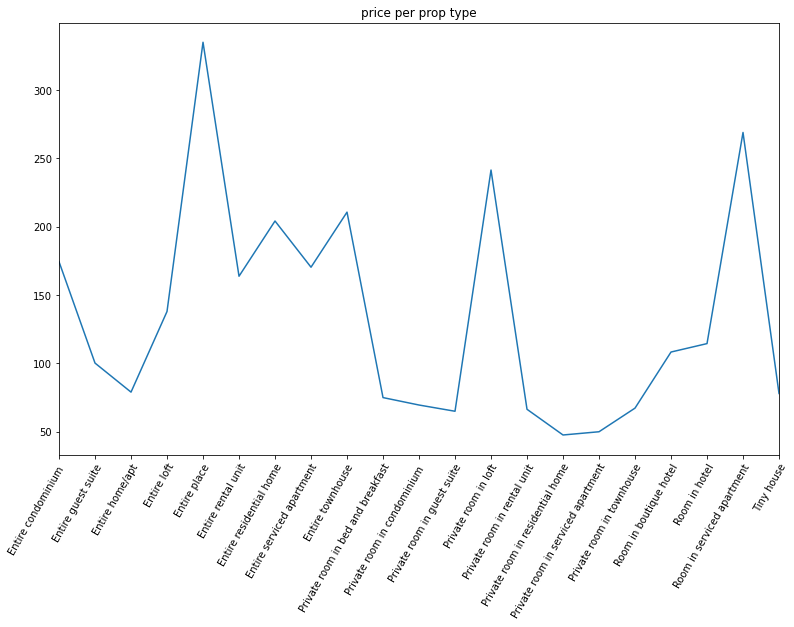

In [71]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([.1,.1,1,1])

grouped_by_property_type.price.plot()

ax.set_xticks(range(len(grouped_by_property_type.property_type.unique())))
ax.set_xticklabels(grouped_by_property_type.property_type,rotation=60,ha='right',rotation_mode='anchor',fontsize='medium')
ax.set_title('price per prop type')

## The column 'neighbourhood_cleansed' is confusing I will change the header to "Ward", then rename each value in that column to its proper name

In [72]:
df_no_outlier.rename(columns={'neighbourhood_cleansed':'Ward'}, inplace=True)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [73]:
df_no_outlier.Ward.value_counts()

Ward E (councilmember James Solomon)           223
Ward F (councilmember Jermaine D. Robinson)    139
Ward C (councilmember Richard Boggiano)        132
Ward D (councilmember Michael Yun)             107
Ward B (councilmember Mira Prinz-Arey)          65
Ward A (councilmember Denise Ridley)            53
Name: Ward, dtype: int64

In [74]:
df_no_outlier.loc[df_no_outlier.Ward == 'Ward A (councilmember Denise Ridley)', 'Ward'] = 'Greenville'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward B (councilmember Mira Prinz-Arey)', 'Ward'] = 'West Side'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward C (councilmember Richard Boggiano)', 'Ward'] = 'Journal Square'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward D (councilmember Michael Yun)', 'Ward'] = 'Heights'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward F (councilmember Jermaine D. Robinson)', 'Ward'] = 'Downtown'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward E (councilmember James Solomon)', 'Ward'] = 'Bergen-Lafayette'

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [75]:
df_no_outlier.Ward.value_counts()

Bergen-Lafayette    223
Downtown            139
Journal Square      132
Heights             107
West Side            65
Greenville           53
Name: Ward, dtype: int64

In [76]:
df_no_outlier.room_type.value_counts()

Entire home/apt    468
Private room       239
Hotel room          12
Name: room_type, dtype: int64

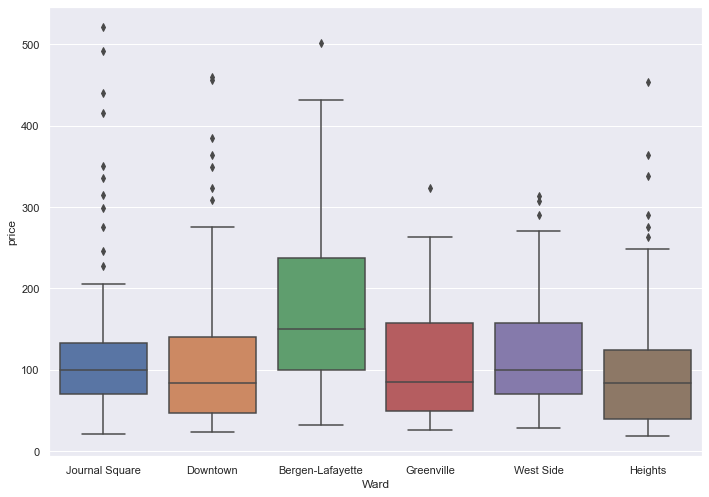

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Ward',y='price', data=df_no_outlier)

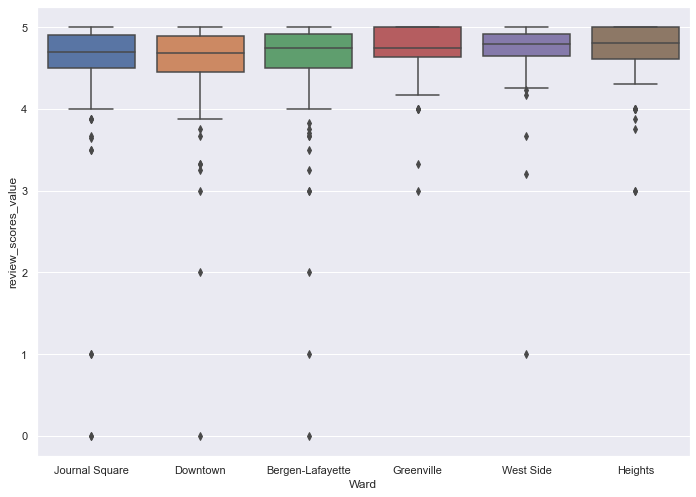

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Ward',y='review_scores_value', data=df_no_outlier)

In [79]:
greater_than_avg=df_no_outlier[df_no_outlier.price >= df_no_outlier.groupby("property_type").price.transform('mean')]
greater_than_avg

,id,description,host_name,host_is_superhost,Ward,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,zscore
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Journal Square,Jersey City,40.737420,-74.052550,Private room in condominium,Private room,...,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07,-0.117051
7,675483,Enjoy your stay in the tri-state area at my to...,Leigh,t,Bergen-Lafayette,Jersey City,40.722680,-74.042510,Private room in townhouse,Private room,...,330,4.76,4.84,4.69,4.96,4.93,4.83,4.77,2.93,-0.488167
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Bergen-Lafayette,Jersey City,40.713550,-74.033740,Entire rental unit,Entire home/apt,...,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41,0.350555
16,1897139,Standing 50 stories high and overlooking Manha...,Churchill,f,Bergen-Lafayette,Jersey City,40.724260,-74.036710,Entire rental unit,Entire home/apt,...,20,4.60,4.65,4.75,4.80,4.60,4.90,4.40,0.22,0.766205
17,1897262,Standing 50 stories high and overlooking Manha...,Churchill,f,Bergen-Lafayette,Jersey City,40.724260,-74.036710,Entire rental unit,Entire home/apt,...,7,4.43,4.43,4.43,4.57,4.57,5.00,4.71,0.09,1.419369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,53563041,Relax with the whole family at this peaceful p...,Dashnay,f,West Side,Jersey City,40.715960,-74.092600,Entire townhouse,Entire home/apt,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0.521268
960,53671565,"Keep it simple at this peaceful, safe, and cen...",Chris,f,Bergen-Lafayette,Jersey City,40.722260,-74.039330,Private room in rental unit,Private room,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,-0.027983
973,53709316,"Enjoy this modern, mid-century apt that was re...",Matthew,f,Journal Square,Jersey City,40.728271,-74.064651,Entire rental unit,Entire home/apt,...,2,5.00,5.00,4.50,5.00,5.00,5.00,5.00,2.00,2.013155
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Heights,Jersey City,40.744520,-74.059930,Entire rental unit,Entire home/apt,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0.150152


In [80]:
below_than_avg=df_no_outlier[df_no_outlier.price < df_no_outlier.groupby("property_type").price.transform('mean')]
below_than_avg

,id,description,host_name,host_is_superhost,Ward,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,zscore
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Downtown,Jersey City,40.71663,-74.05799,Entire residential home,Entire home/apt,...,137,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10,-0.243231
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Downtown,Jersey City,40.71266,-74.06329,Entire rental unit,Entire home/apt,...,380,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10,-0.258075
3,270245,Just for you small bedroom with private bathro...,Magda,f,Downtown,Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04,-0.725682
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Downtown,Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43,-0.606924
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Bergen-Lafayette,Jersey City,40.71979,-74.04549,Entire rental unit,Entire home/apt,...,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49,-0.035406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,53706643,This special place is close to many attraction...,Trinn,f,West Side,Jersey City,40.71626,-74.09322,Entire serviced apartment,Entire home/apt,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,0.105618
975,53717497,"Kick back and relax in this calm, stylish spac...",Zohar,f,Greenville,Jersey City,40.70986,-74.09496,Private room in condominium,Private room,...,5,4.20,4.20,4.60,4.20,4.20,4.60,4.20,5.00,-0.577235
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Downtown,Jersey City,40.71440,-74.05805,Entire rental unit,Entire home/apt,...,1,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,-0.287765
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,West Side,Jersey City,40.71598,-74.09168,Entire rental unit,Entire home/apt,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,-0.042828


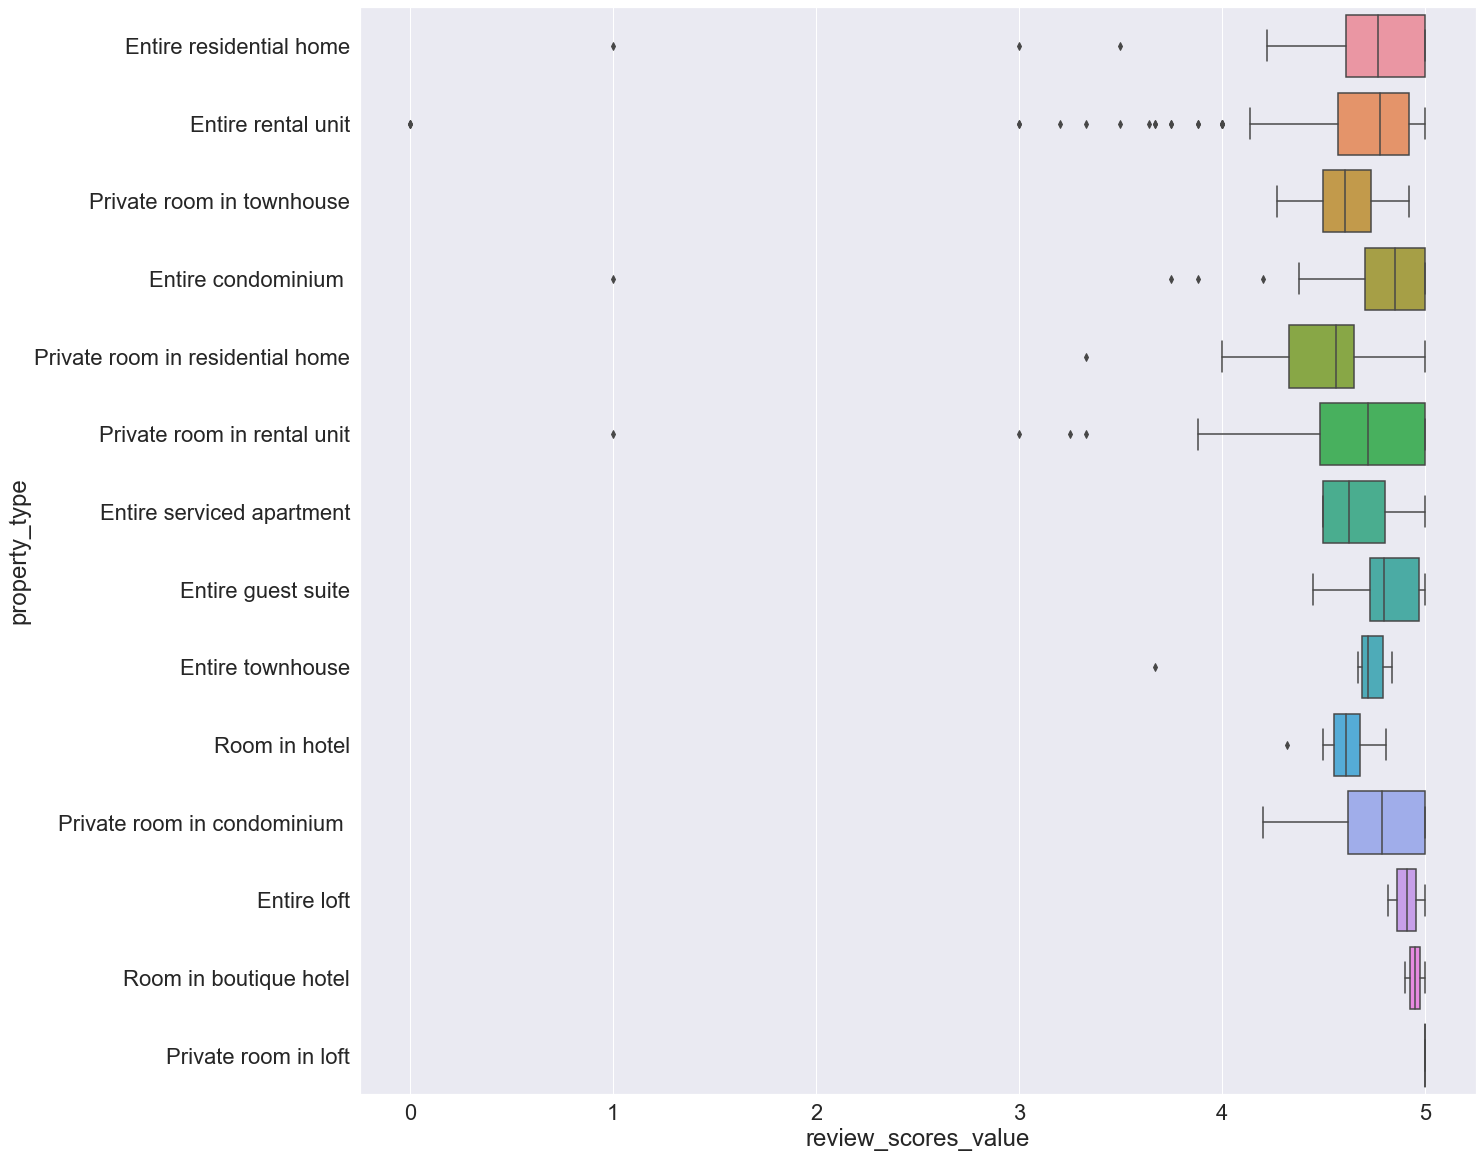

In [81]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)
sns.boxplot(x='review_scores_value',y='property_type', data=below_than_avg)

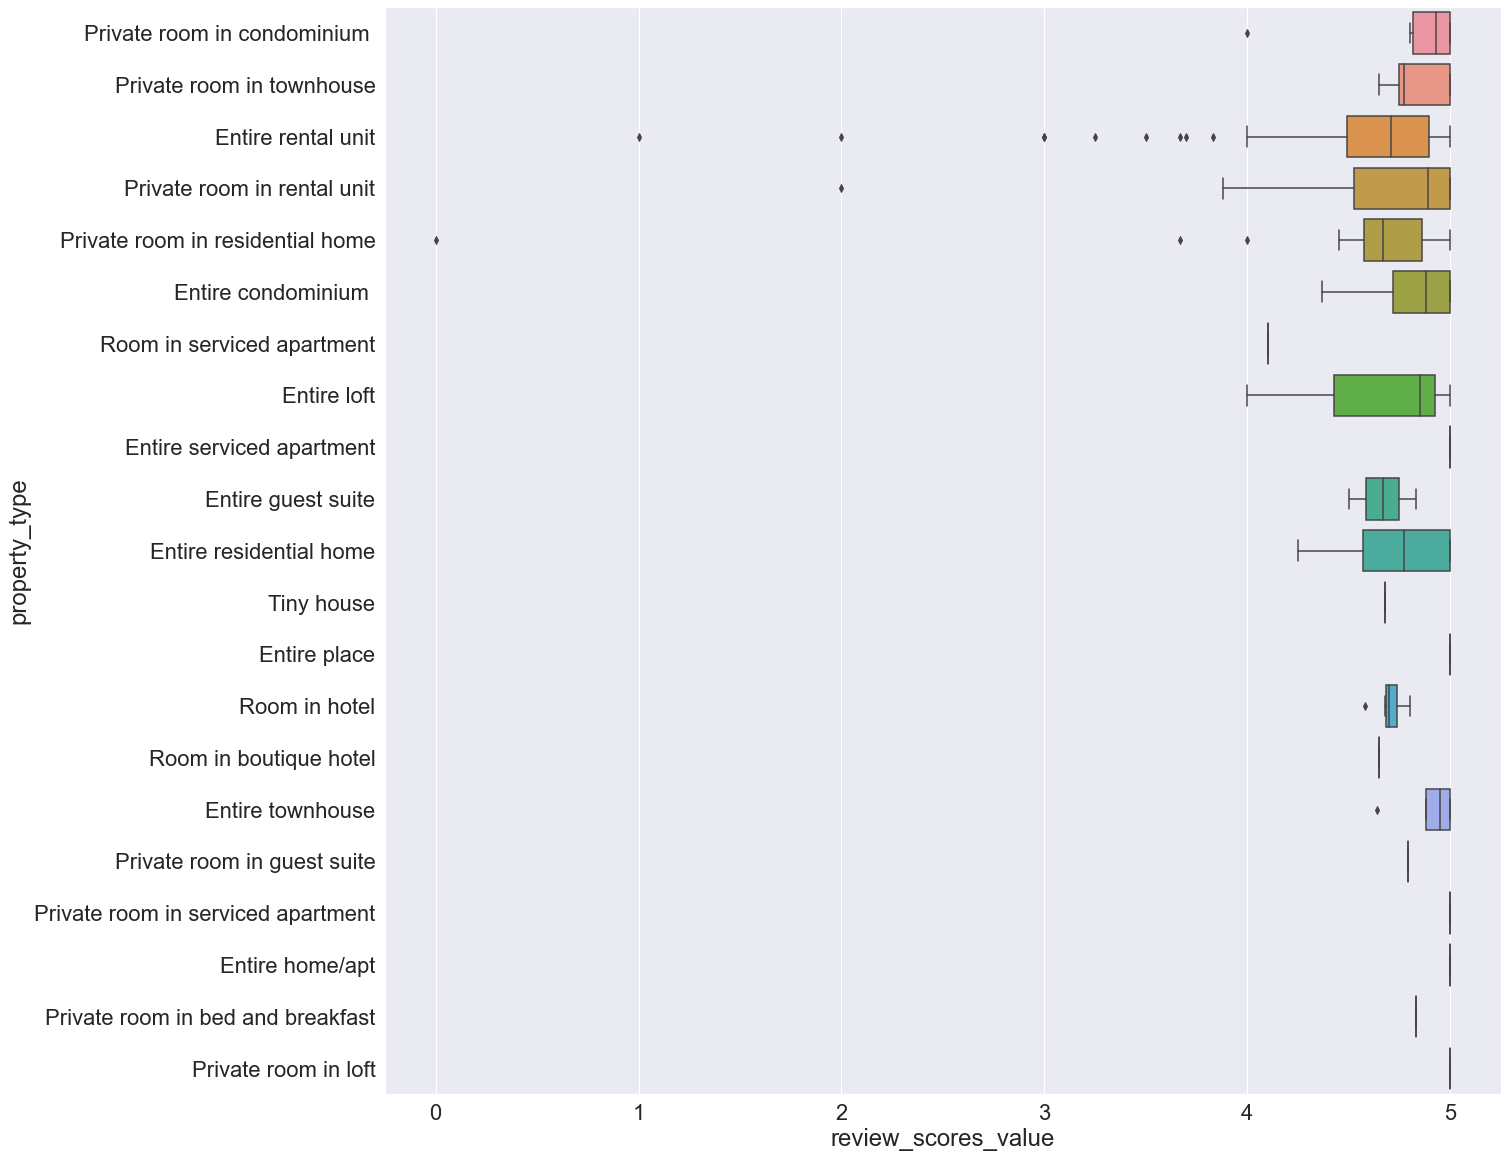

In [82]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)

sns.boxplot(x='review_scores_value',y='property_type', data=greater_than_avg)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


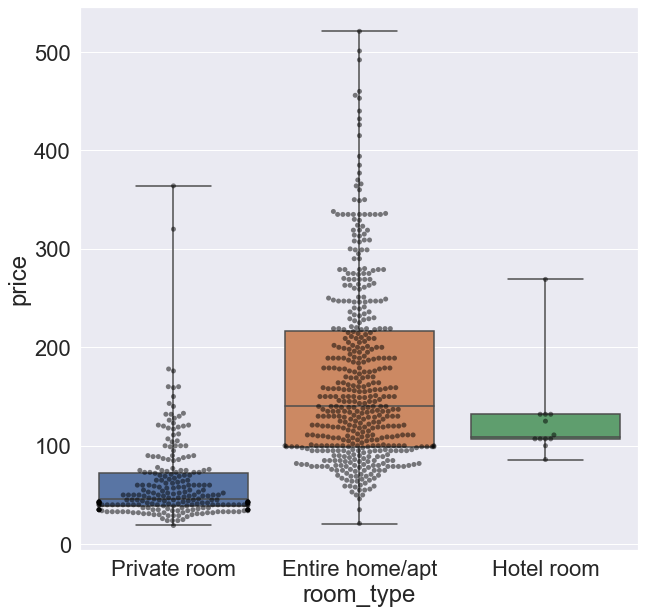

In [94]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.boxplot(x="room_type", y="price",whis=np.inf, data=df_no_outlier)
sns.swarmplot(x="room_type", y="price",color='black',alpha=.5 ,data=df_no_outlier)


#  Super Host

In [84]:
df_no_outlier.host_is_superhost.value_counts()

f    510
t    209
Name: host_is_superhost, dtype: int64

In [85]:
df_no_outlier.host_is_superhost.value_counts()

f    510
t    209
Name: host_is_superhost, dtype: int64

In [86]:
df_no_outlier.loc[df_no_outlier.host_is_superhost == 'f', 'host_is_superhost'] = 0
df_no_outlier.loc[df_no_outlier.host_is_superhost == 't', 'host_is_superhost'] = 1

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Before I continoue to Modeling I will first drop the columns that I believe I do not need anymore, and second convert all the 'object' dtypes to types that can be used for the algorithms

In [95]:
df_no_outlier.dtypes

id                               int64
description                     object
host_name                       object
host_is_superhost                int64
Ward                            object
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
amenities                       object
price                            int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
zscore                         float64
dtype: object

In [105]:
df_no_outlier.drop(['id','description','host_name','neighbourhood','latitude','longitude','reviews_per_month'],axis=1,inplace=True)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
df_no_outlier.drop(['zscore'],axis=1,inplace=True)

In [117]:
df_no_outlier.drop(['amenities'],axis=1,inplace=True)

In [118]:
df_no_outlier.dtypes

host_is_superhost                int64
Ward                            object
property_type                   object
room_type                       object
accommodates                     int64
price                            int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [119]:
df=pd.get_dummies(df_no_outlier)

In [120]:
df.head()

,host_is_superhost,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,property_type_Private room in residential home,property_type_Private room in serviced apartment,property_type_Private room in townhouse,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
0,0,2,128,10,5.00,5.00,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,0,0,1
1,1,4,111,137,4.76,4.78,4.88,4.84,4.90,4.31,...,0,0,0,0,0,0,0,1,0,0
2,0,5,109,380,4.34,4.62,4.55,4.68,4.65,3.80,...,0,0,0,0,0,0,0,1,0,0
3,0,1,46,249,4.50,4.65,4.68,4.71,4.68,3.89,...,0,0,1,0,0,0,0,0,0,1
4,0,5,62,286,4.38,4.55,4.65,4.64,4.56,3.76,...,0,0,1,0,0,0,0,0,0,1


In [121]:
df.dtypes

host_is_superhost                                     int64
accommodates                                          int64
price                                                 int64
number_of_reviews                                     int64
review_scores_rating                                float64
review_scores_accuracy                              float64
review_scores_cleanliness                           float64
review_scores_checkin                               float64
review_scores_communication                         float64
review_scores_location                              float64
review_scores_value                                 float64
Ward_Bergen-Lafayette                                 uint8
Ward_Downtown                                         uint8
Ward_Greenville                                       uint8
Ward_Heights                                          uint8
Ward_Journal Square                                   uint8
Ward_West Side                          

# Modeling

In [130]:
# x is the independent variable
# y is the dependant variable

X=df.drop('price', axis =1)
y=df.price

In [131]:
X.columns

Index(['host_is_superhost', 'accommodates', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'Ward_Bergen-Lafayette', 'Ward_Downtown',
       'Ward_Greenville', 'Ward_Heights', 'Ward_Journal Square',
       'Ward_West Side', 'property_type_Entire condominium ',
       'property_type_Entire guest suite', 'property_type_Entire home/apt',
       'property_type_Entire loft', 'property_type_Entire place',
       'property_type_Entire rental unit',
       'property_type_Entire residential home',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in condominium ',
       'property_type_Private room in guest suite',
       'property_type_Private room in loft',
       'property_type_

In [126]:
y

0      128
1      111
2      109
3       46
4       62
      ... 
987    105
988    138
993    164
997    129
999    216
Name: price, Length: 719, dtype: int64

In [170]:
# split into training and testing

In [129]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3,random_state=1234)

In [134]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(503, 40) (216, 40) (503,) (216,)


### Import Dependecies

In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [139]:
piplelines= {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))
    
}

In [155]:
hypergrid={
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    },
    'ridge':{
        'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    },
    'lasso':{
        'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99] 
    },
    'enet':{
        'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    }
    
}

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [157]:
fit_models={}
for algo,pipeline in piplelines.items():
    model=GridSearchCV(pipeline,hypergrid[algo], cv=10,n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
        

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [172]:
predicted=fit_models['gb'].predict(X_test)
expected=y_test

In [173]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))


RMS: 53.405771792486874 


## Evaluation

In [164]:
from sklearn.metrics import r2_score, mean_absolute_error

In [166]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo,r2_score(y_test,yhat),mean_absolute_error(y_test,yhat)))

rf scores - R2:0.5309341626759456 MAE:39.48764554606916
gb scores - R2:0.5609201431253812 MAE:39.14877886648311
ridge scores - R2:0.553388859605039 MAE:41.50966443493554
lasso scores - R2:0.5633378938799398 MAE:41.13896959580917
enet scores - R2:0.5621402443217323 MAE:40.985548015867785


In [ ]:
Deployment